## Veri Setini Yükle


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# # ----------------------------------------------------------------------
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# # ----------------------------------------------------------------------
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.cluster import KMeans
# from sklearn.ensemble import ExtraTreesClassifier
# # ----------------------------------------------------------------------
# from sklearn.decomposition import PCA
# # ----------------------------------------------------------------------
# from xgboost import XGBClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from catboost import CatBoostClassifier
# from lightgbm import LGBMClassifier
# # ----------------------------------------------------------------------
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis





In [10]:
# Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
dataset_csv_path = "/content/drive/MyDrive/Makale-Döküman-Makale Çalışmaları/YL Dersler/Veri Analizi ve İstatistik/proje/online_shoppers_intention.csv"

In [12]:

df = pd.read_csv(dataset_csv_path)
print("Dataset loaded successfully.")
df.head()

Dataset loaded successfully.


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Veri Setine Genel Bakış

In [13]:
print("İlk birkaç satır:")
df.head()

print("\nVeri tipleri ve eksik olmayan değerler:")
df.info()

print("\nEksik değerlerin sayısı:")
df.isnull().sum()

İlk birkaç satır:

Veri tipleri ve eksik olmayan değerler:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region           

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


## Keşifçi Veri Analizi (EDA)



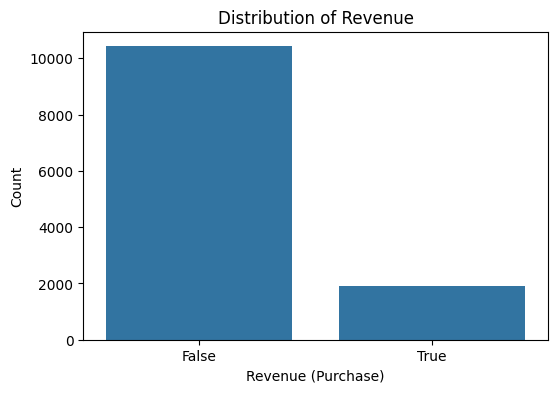

Revenue Değişkeninin Yüzdesel Dağılımı:
Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64


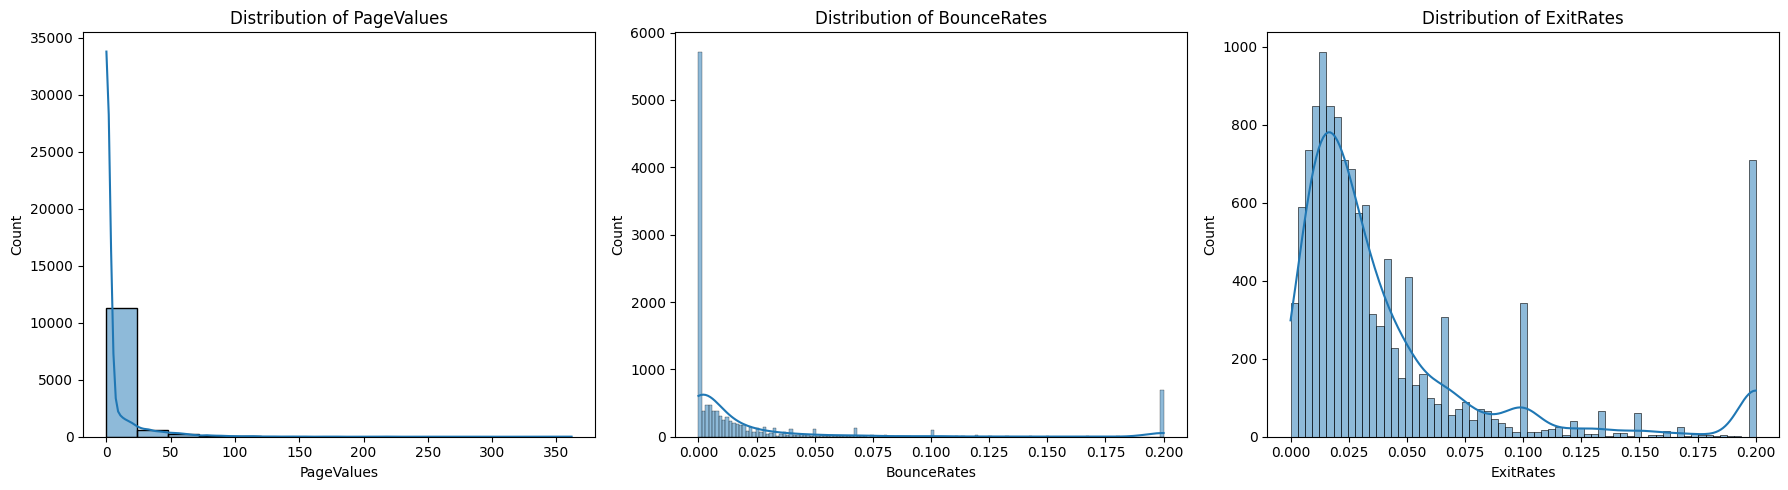

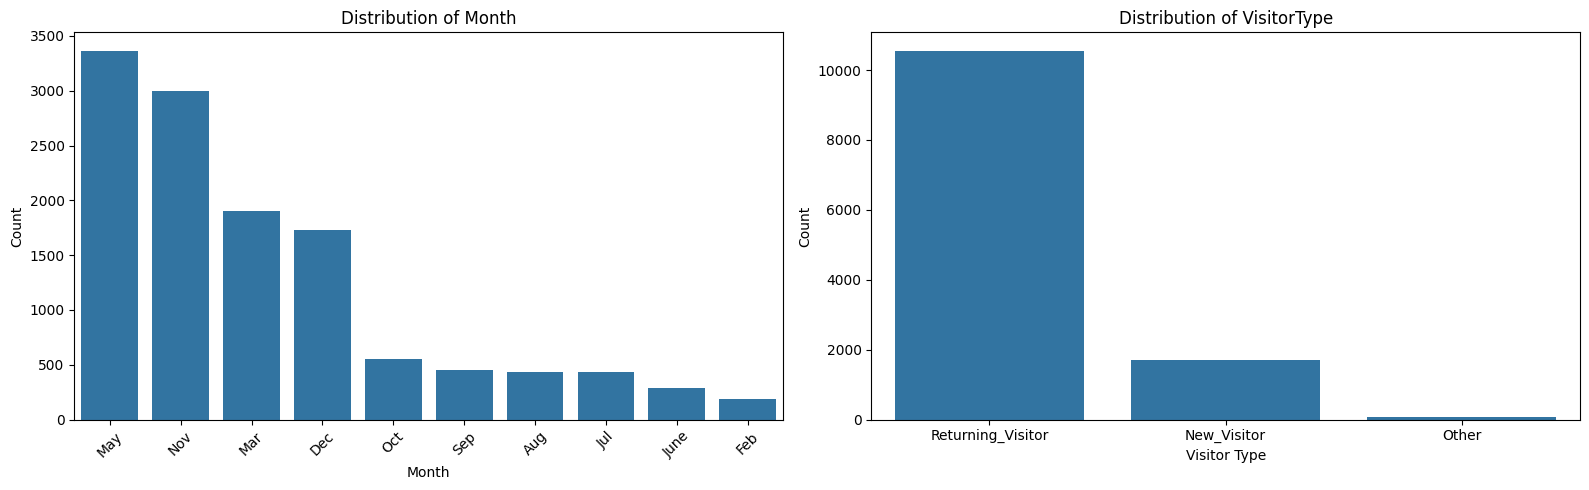

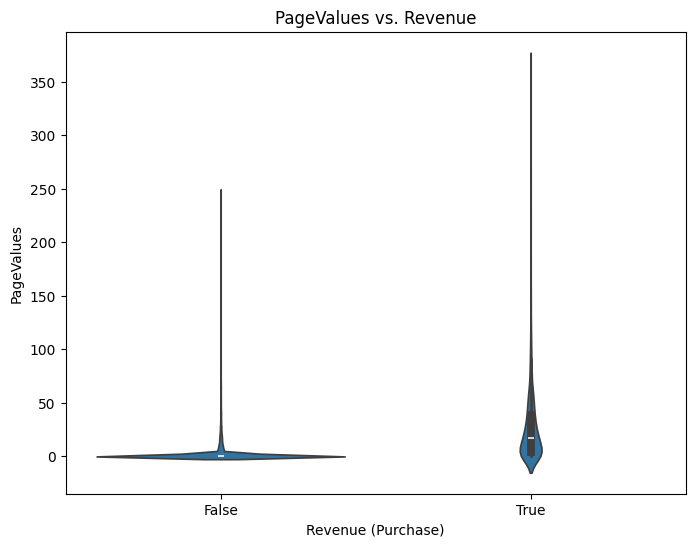

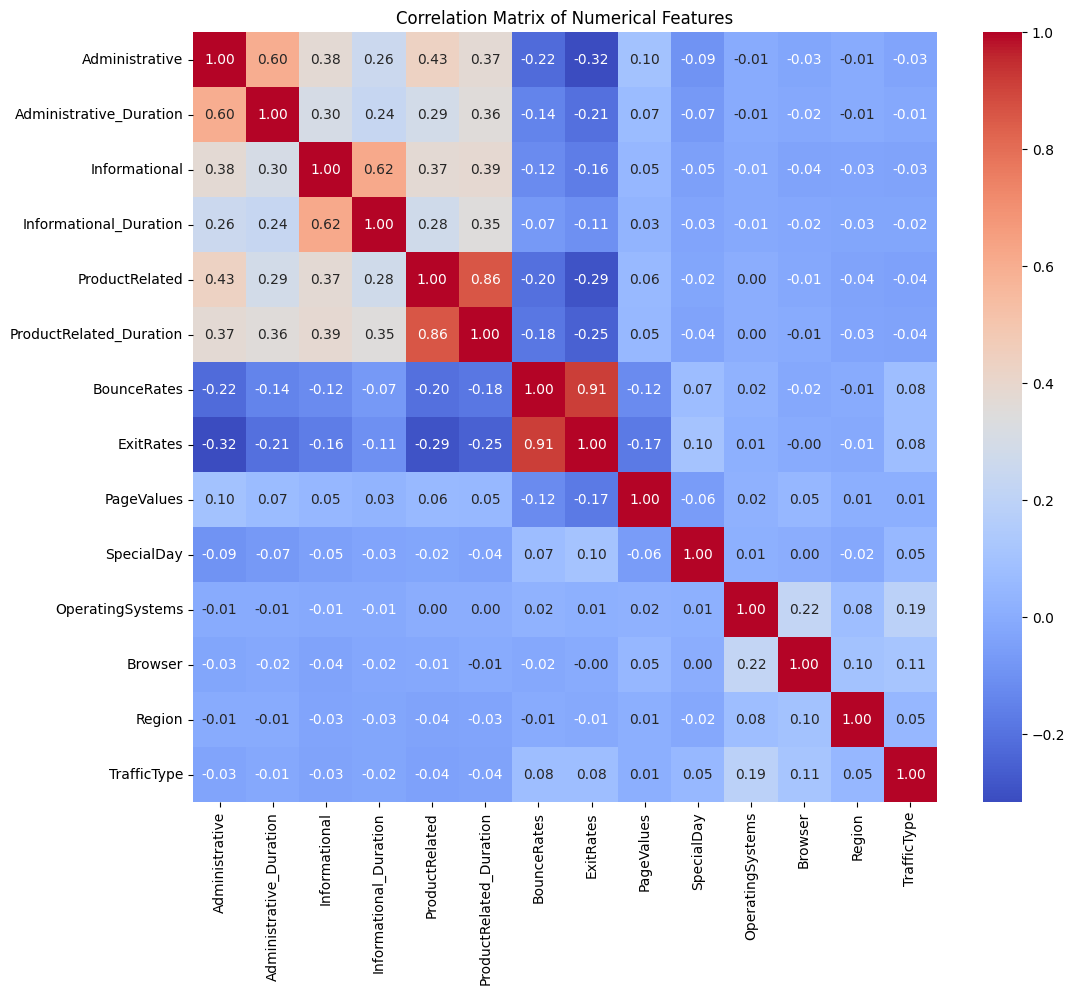

In [14]:


# 1. Hedef değişken 'Revenue' dağılımı
plt.figure(figsize=(6, 4))
sns.countplot(x='Revenue', data=df)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue (Purchase)')
plt.ylabel('Count')
plt.show()

print("Revenue Değişkeninin Yüzdesel Dağılımı:")
print(df['Revenue'].value_counts(normalize=True) * 100)

# 2. Önemli sayısal özelliklerin dağılımı (histogramlar)
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['PageValues'], kde=True)
plt.title('Distribution of PageValues')

plt.subplot(1, 3, 2)
sns.histplot(df['BounceRates'], kde=True)
plt.title('Distribution of BounceRates')

plt.subplot(1, 3, 3)
sns.histplot(df['ExitRates'], kde=True)
plt.title('Distribution of ExitRates')
plt.tight_layout()
plt.show()

# 3. Önemli kategorik özelliklerin dağılımı (çubuk grafikler)
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Month', data=df, order=df['Month'].value_counts().index)
plt.title('Distribution of Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='VisitorType', data=df, order=df['VisitorType'].value_counts().index)
plt.title('Distribution of VisitorType')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 4. 'Revenue' ile 'PageValues' arasındaki ilişki (violinplot)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Revenue', y='PageValues', data=df)
plt.title('PageValues vs. Revenue')
plt.xlabel('Revenue (Purchase)')
plt.ylabel('PageValues')
plt.show()

# 5. Sayısal özellikler arasındaki korelasyonlar (ısı haritası)
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()